# Bi Data
värden samlade från den digitala bikupan som jag tar hand om upp vid I11.
informationsmängden består av 
* lufttemperatur
* lufttryck
* luftfuktighet
* Datum
* Vikt
  Målet är att prediktera vikten på bisamhället vid ett specifikt datum.

### Load the data
Datat är hämtat från grafana instansen som jag har tillgång till för att kunna visualizera insamlade värden.
Det är sendan importerat i en sql databas där det är normalizerat så att medelvärden är uttagna per timme.

In [133]:
import pandas as pd
url = "Bi-Data2.csv"
##columns = ['Time','Temp','Luftfuktighet','Lufttryck','Vikt']
df = pd.read_csv(url, delimiter=';')
df.head()

,Year,Month,Day,Hour,Temp,Luftfuktighet,Lutftryck,Vikt
0,2022,7,1,1,21.488103,43.850333,951.702000,109.753333
1,2022,7,1,2,21.206724,43.739500,949.637833,110.048305
2,2022,7,1,3,20.918275,43.657500,948.442166,110.082166
3,2022,7,1,4,20.628620,43.612000,947.578666,110.329830
4,2022,7,1,5,20.278965,43.580000,946.931166,110.212166


In [134]:
#some info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4065 non-null   int64  
 1   Month          4065 non-null   int64  
 2   Day            4065 non-null   int64  
 3   Hour           4065 non-null   int64  
 4   Temp           4065 non-null   float64
 5   Luftfuktighet  4065 non-null   float64
 6   Lutftryck      4065 non-null   float64
 7   Vikt           4065 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 254.2 KB


### Visualize the data

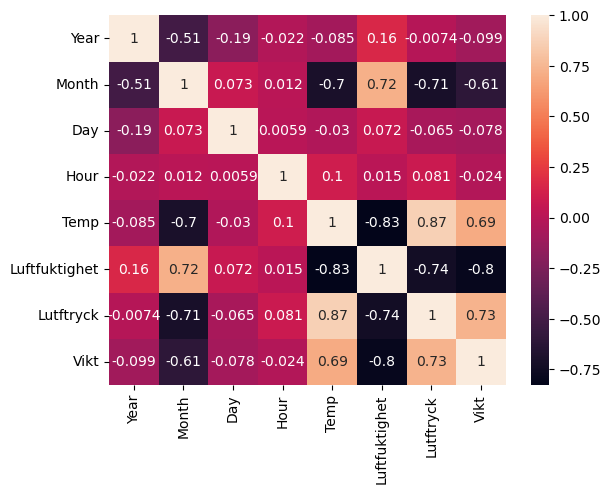

In [135]:
# Visualize the whole dataset
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(),annot=True)
plt.show()

In [136]:
#target vector
Y = df["Vikt"]
#Feature
X = df[["Year","Month","Day","Hour","Temp","Luftfuktighet","Lutftryck"]]

### Split data


In [137]:
from sklearn.model_selection import train_test_split
# Split the data to train and test dataset.
from random import random
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


### Evaluate_models

In [138]:
#Random forest
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

forestModel = make_pipeline(
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(n_estimators=100,
                          max_depth=50,
                          random_state=77,
                          n_jobs=-1
                        )
)
forestModel.fit(X_train,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

In [139]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lm = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)
lm.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [140]:
#"Evaluate"
from sklearn.metrics import mean_absolute_error

print('Linear Regression training MAE:', round(mean_absolute_error(y_train, lm.predict(X_train)),5))
print('Linear Regression Test MAE:', round(mean_absolute_error(y_test, lm.predict(X_test)),5))

print('Random forest regressor model training MAE:', round(mean_absolute_error(y_train, forestModel.predict(X_train)),5))
print('Random forest regressor model Test MAE:', round(mean_absolute_error(y_test, forestModel.predict(X_test)),5))

Linear Regression training MAE: 10.24238
Linear Regression Test MAE: 10.46084
Random forest regressor model training MAE: 0.3045
Random forest regressor model Test MAE: 0.60432


In [141]:
# Make predictions on validation dataset
from sklearn.metrics import accuracy_score
predictions = lm.predict(X_test)
# Evaluate predictions
LMaccuracy = lm.score(X_test, y_test)
print ('Linear Regression model prediction accuracy:' , LMaccuracy)
FMaccuracy = forestModel.score(X_test, y_test)
print ('Random forest regressor model prediction accuracy:' , FMaccuracy)


Linear Regression model prediction accuracy: 0.6476382269609828
Random forest regressor model prediction accuracy: 0.9936132255646797


### Test the model

In [142]:
#Test
#Year	Month	Day	Hour	Temp	Luftfuktighet	Lutftryck	Vikt
X_new = np.array([[2023,7,1,3,28,60,1005],[2023,1,3,4,4.517586,81.638000,892.657333]]) #[110.082166][60.495833]
forestModel.predict(X_new) 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


array([112.6537493 ,  60.49701244])